**Question 1**

Prepare a table containing all the activities that you plan to do in the city of your rotation, with a
short, compelling justification of why they are interesting. The table needs to include:
- at least 5 activities, each of which can be subdivided into 3 to k sub-tasks. 
- How will you store information about these activities and sub-tasks?
- Describe how your scheduler will work, with an emphasis on why a priority queue is a well-suited data structure to handle the prioritization of tasks, and how you have defined and computed the priority value of each task and/or sub-task.

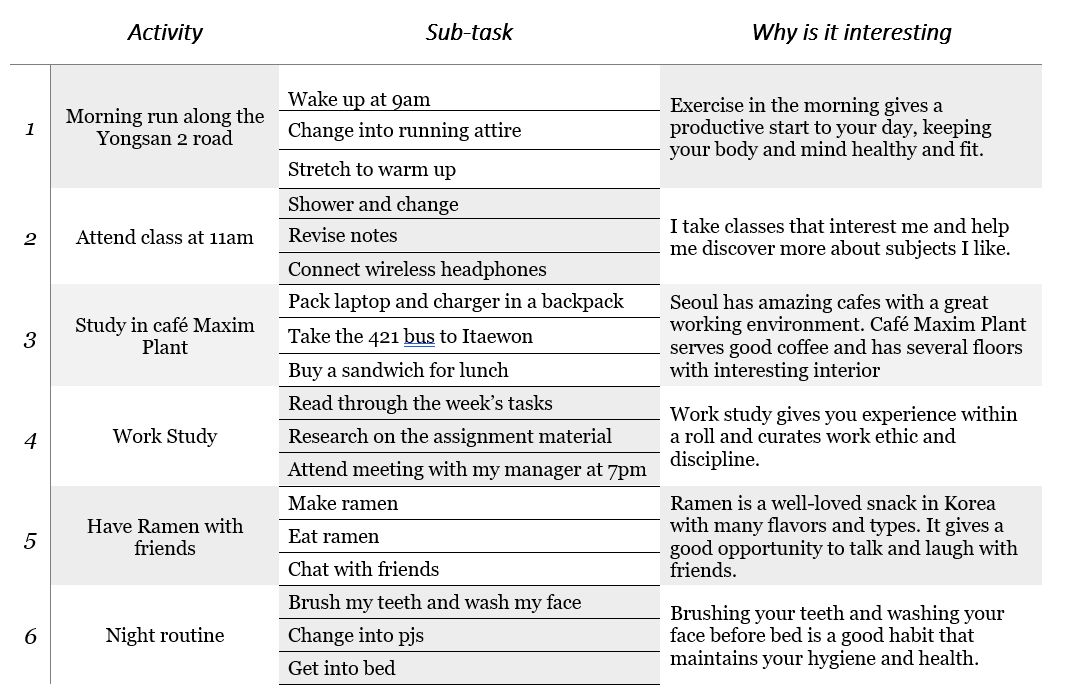

In [110]:
from IPython.display import Image, display

image_selection = 'Schedule.png'
display(Image(image_selection))

**How will you store information about these activities and sub-tasks?**

Each sub-task and activity can exist as a task with its own distinct ID, description, duration, dependencies, and a status. We create an array of arrays with the mentioned variables, storing the required information for each task. Along with these values, another variable included will be the time range the task needs to be done within (measured in minutes. For example, ‘Taking a class’ will be constrained by the time the class is scheduled at: 11 am, therefore, it will need to be started at 11:00. This information can be stored in minutes after the counter has started, i.e., T minutes after waking up the class needs to be done.


**Describe how your scheduler will work, with an emphasis on why a priority queue is a well-suited data structure to handle the prioritization of tasks, and how you have defined and computed the priority value of each task and/or sub-task.**

How the scheduler works: 

•	The data for the scheduler will be stored within a priority queue that uses heap sort function, with the key being the priority, to sort the list of tasks and output the task with the highest priority. 

•	The priority can be calculated based on a dynamic model, integrating the user’s preference as well as the list of things a task depends on: 

    o	The value entered by the user between 0 – 100 that describes their personal priority 
    o	The number of dependencies of the task: a task cannot be completed unless the tasks it depends on are completed as well. For example, if I have a task of ‘Eat lunch’, this depends on other tasks such as cooking and serving the food. 
The priorities for each task will be calculated before they can be sorted. This allows the information to exist independently of the MaxHeapq arranging the tasks in order. This method of calculating priority is better because it can realistically takes into account the dependency of an activity on its subtasks while keeping into account the user’s input as well.   

•	The scheduler performs several step-by-step operations:

    o	For each task assigns it a status (Not started, In queue, Completed) based on which tasks are moved in and out of the priority queue
    o	Tasks are executed as they are pushed into the priority queue – this is done based on their priority values. 
    o	Schedules tasks one after another based on the time duration they are assigned, e.g. ‘waking up’ is scheduled at 8am and lasts for 10 minutes, ‘brush you teeth’ is scheduled after this based on the time calculated from 8am – 10 minutes after. 


**Question 2**

- Program an activity scheduler in Python, which receives the list of tasks above as input and returns a schedule for you to follow.
- In addition to the actual scheduler, provide at least one simple example to demonstrate how your scheduler prioritizes tasks based on their priority value.

In [1]:
class MaxHeapq:
    """ 
    A class that implements properties and methods 
		that support a max priority queue data structure

		Attributes
	  ----------
	  heap : arr
	      A Python list where key values in the max heap are stored
	  heap_size: int
	      An integer counter of the number of keys present in the max heap
	  """  

    def __init__(self):       
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
       
        return 2 * i + 1

    def right(self, i):

        return 2 * i + 2

    def parent(self, i):
    

        return (i - 1)//2

    def maxk(self):     

        return self.heap[0]     
    
  
    def heappush(self, key):  
        self.heap.append(Task(-1, '', 10, [], -float("inf"), 0))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        if key.priority < self.heap[i].priority:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)].priority < self.heap[i].priority:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l].priority >heap[i].priority:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r].priority > heap[largest].priority:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

In [2]:
# the following code is a modified version of the code we studied in CS110 5.2 session 

class Task:
    """
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - priority: Priority level of a task (ranging from 0 to 100)   
    - status: Current status of the task:       
   
    """
    #Initializes an instance of Task
    def __init__(self, task_id, description, duration, dependencies, priority, constraint, multi_task = False, status="N"):
        self.id = task_id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.constraint = constraint 
        self.priority = priority 
        self.multi_task = multi_task
      
        
    def __repr__(self):
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tStatus: {self.status}"

    def __lt__(self, other):
        return self.id < other.id
    
    #def priority_calc(self, priority):
        #self.priority += 
    
class TaskScheduler():
    """
    A Simple Daily Task Scheduler Using Priority Queues
    """
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = MaxHeapq()  
        self.plist = MaxHeapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)
    
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                self.priority_queue.heappush(task)
            
                   
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"

    
    def run_task_scheduler(self):
        #sets the current time to be first constraint set by the user. For example I wake up at 9am, that becomes my starting time. 
        current_time = self.tasks[0].constraint
        starting_time = current_time
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size != 0:# or self.constrained_queue.heap_size != 0:
            self.get_tasks_ready()
            #if self.tasks[t].constraint == 0:
            task = self.priority_queue.heappop()
            #verifies that if a constraint does exist, that task is scheduled at that time despite the running clock.
            if task.constraint > 0:
                print(f"⏰Simple Scheduler at time {self.format_time(task.constraint)} started executing task {task.id} that takes {task.duration} mins")
                current_time = task.constraint + task.duration 
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                self.remove_dependency(task.id)
                task.status = self.COMPLETED 
            else:
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration 
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                self.remove_dependency(task.id)
                task.status = self.COMPLETED 

        total_time = current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        total_time = current_time - starting_time
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        
        
#The time constraint could have been implemented but my code kept moving the index of tasks so that the relevent task's index
#was not being accessed, through which I wanted to check that its constraint does exist and it should be excuted at the
#time mentioned. Instead the priority of the task takes over the function and excutes it before, hence messing up the indexing
# To make this work, I would need to give t the value of the task ids, which I do not know how to access at the moment. 

In [8]:
#in the input I have purposfully left gaps in between constrained tasks to show that despite the running clock, the constrained 
#tasks are scheduled at their given times, for example 'check interent connect ends at 10:55, but the class starts at 11:00. 
tasks = [
    Task(0, 'wake up at 9:00 AM', 10, [], 100, 540), 
    Task(1, 'Have breakfast', 15, [0], 95, 0), 
    Task(2, 'Change into running attire', 15, [0], 70, 0), 
    Task(3, 'Stretch to warm up', 10, [0], 60, 0), 
    Task(4, 'run along Yongsan 2 road', 30, [2, 3], 70, 0), 
    Task(5, 'Shower and change', 15, [4], 90, 0), 
    Task(6, 'Revise notes', 15, [5], 85, 0), 
    Task(7, 'Check internet and audio connection', 5, [6], 80, 0), 
    Task(8, 'Attend 11am class', 90, [5,6, 7], 100, 660),
    Task(9, 'Pack laptop and charger in a backpack', 15, [8], 70, 0),
    Task(10, 'Take the 421 bus to Itaewon', 25, [9], 60, 0),
    Task(11, 'Buy a sandwich for lunch', 20, [10], 80, 0),
    Task(12, 'Study at cafe Maxim Plant', 180, [10], 90, 0),
    Task(13, 'Take a bus back to the Rez', 30, [12], 90, 0),
    Task(14, 'Take a nap', 60, [13], 50, 0),
    Task(15, 'Read through the week’s work study tasks', 20, [13], 70, 0),
    Task(16, 'Research on the assignment material', 30, [15], 70, 0),
    Task(17, 'Attend meeting with my manager at 7pm', 60, [16], 100, 1140),
    Task(18, 'Make ramen', 20, [17], 50, 0),
    Task(19, 'Eat ramen', 20, [18], 80, 0),
    Task(20, 'Social with friends', 60, [19], 70, 0),
    Task(21, 'Brush my teeth and wash my face', 10, [20], 90, 0),
    Task(22, 'Change into pjs', 5, [21], 80, 0),
    Task(23, 'Get into bed', 5, [22], 100, 1380),]

task_scheduler = TaskScheduler(tasks)
#task_scheduler.print_self()
task_scheduler.run_task_scheduler()
#task_scheduler.get_tasks_ready() 

⏰Simple Scheduler at time 9h00 started executing task 0 that takes 10 mins
✅ Completed Task 0 - 'wake up at 9:00 AM' at time 9h10

⏰Simple Scheduler at time 9h10 started executing task 1 that takes 15 mins
✅ Completed Task 1 - 'Have breakfast' at time 9h25

⏰Simple Scheduler at time 9h25 started executing task 2 that takes 15 mins
✅ Completed Task 2 - 'Change into running attire' at time 9h40

⏰Simple Scheduler at time 9h40 started executing task 3 that takes 10 mins
✅ Completed Task 3 - 'Stretch to warm up' at time 9h50

⏰Simple Scheduler at time 9h50 started executing task 4 that takes 30 mins
✅ Completed Task 4 - 'run along Yongsan 2 road' at time 10h20

⏰Simple Scheduler at time 10h20 started executing task 5 that takes 15 mins
✅ Completed Task 5 - 'Shower and change' at time 10h35

⏰Simple Scheduler at time 10h35 started executing task 6 that takes 15 mins
✅ Completed Task 6 - 'Revise notes' at time 10h50

⏰Simple Scheduler at time 10h50 started executing task 7 that takes 5 mins


**Question 3**

Now, you realize that some of the tasks in your schedule can be multi-tasked! In other words, many of
your daily tasks can be performed simultaneously (e.g. sipping a local beverage while chatting with a
friend at a cafe, taking pictures while riding a bus, or walking in a park). You will modify your algorithmic
approach to now handle multi-tasks. Notice that while some tasks can be multi-tasked, others may
demand your full attention.

- Describe as clearly as you can any changes you will need to make to the first version of the scheduler to include multi-tasking activities.
- Describe how constraints in the scheduling process are handled by a priority queue.

Working with the same algorithm, we will make a number of changes so that the code can schedule more than one task together. One way to do this is through creating a new method that can execute this task: 
-	First, we add a new input variable we can pass in our list. Within the class we create a new attribute called ‘multi_task’ that takes a Boolean value
-	Tasks that do not have a constraint can be multitasked
-	The method we create can check for the next task that can be multitasked and schedules them together.
-	If two tasks are selected to be multitasked, the time of the task that takes longer will be incremented 
-	If no other multitaskable task can be found within the range or if the timings do not fit, the current task can just be performed like a regular task. 


Improvements: 

-	Our algorithm does not account for tasks that cannot be logically performed simultaneously, for example showering and revising notes can be done together but it does not make sense to schedule it like that (unless you want to wash your laptop with you – not recommended). 
One way to think about this can be to assign another attribute to the tasks that can classify what essential senses the task utilizes, for example running utilizes feet and hands and so does stretching, they cannot be performed together. The algorithm can cross check for such tasks and exclude them from being multitasked 
-	If we could effectively implement this it could help us create a good decision-making-based schedular that can reduce the stress of trying to schedule things in our life. If a computer could tell me that the most efficient use of my precious time in my university life is to revise my notes and eat an apple, maybe I’ll be able to handle all my tasks better. 


**Question 4**

Write an activity priority scheduler with multi-tasking capability in Python, which receives as input a list
of tasks and reports (outputs) a schedule for you to follow. As before, please refrain from using any
external Python library besides the math and random module (if you intend on using other libraries,
please check with your course instructor first).

In [9]:
#the following code is a modified version of the code we studied in the CS110 5.2 session. 

class Task:
    """
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes  
    - dependencies: the task id of the task it is dependent on
    - priority: Priority level of a task (ranging from 0 to 100) 
    - constraint: The time a task needs to be done at. If there is no such constraint the value is 0.
    - multi_task: if the task is multi-taskable. If it is not, nothing is added and the default remains False. 
    - status: Current status of the task     
   
    """
    #Initializes an instance of Task
    def __init__(self, task_id, description, duration, dependencies, priority, constraint, multi_task = False, status="N"):
        self.id = task_id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.constraint = constraint 
        self.priority = priority 
        self.multi_task = multi_task
      
        
    def __repr__(self):
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n\tStatus: {self.status}"

    def __lt__(self, other):
        return self.id < other.id
    

    
class TaskScheduler():
    """
    A Simple Daily Task Scheduler Using Priority Queues
    """
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = MaxHeapq()  
        self.mlist = MaxHeapq()
       
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)
    
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)           
            
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                self.priority_queue.heappush(task)
            
    def update_priority(self, time_elapsed=0):
        """
        Input: duration of the most recent executed task
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for i in range(len(self.tasks)): 
            self.tasks[i].priority -= time_elapsed               
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks 
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"

    def multi_tasking(self):
        """
        Creates a heap that has all the multi-taskable tasks
        input: list of tasks
        output: list of tasks that can be multi-tasked 
        """
        for task in self.tasks:
            if task.multi_task == True:
                self.mlist.heappush(task)
                              

    def run_multitask_scheduler(self):
        #sets the current time to be first constraint set by the user. For example I wake up at 9am, that becomes my starting time. 
        current_time = self.tasks[0].constraint
        starting_time = current_time
        
        #excutes the entire following code if there is something in the heap or there are tasks left to be scheduled 
        while self.check_unscheduled_tasks() or self.priority_queue.heap_size != 0:# or self.constrained_queue.heap_size != 0:
            self.get_tasks_ready()
            self.multi_tasking() 
            task = self.priority_queue.heappop()
            
            #sets a condition to see if a task can be multi-tasked
            if task.multi_task == True:
                
                #declares a variable for a task that can be performed with our current task
                m_task = self.mlist.heappop()
            
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing tasks {task.id} that takes {task.duration} mins and {m_task.id} that takes {m_task.duration} mins")

                #the following two conditions check for the task with the greater duration so that the current time can be appended accordingly.
                
                if m_task.duration > task.duration:
                    current_time += task.duration
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                    current_time += m_task.duration - task.duration
                    print(f"✅ Completed Task {m_task.id} - '{m_task.description}' at time {self.format_time(current_time)}\n")
                    self.update_priority(m_task.duration)

                else:
                    current_time += m_task.duration
                    print(f"✅ Completed Task {m_task.id} - '{m_task.description}' at time {self.format_time(current_time)}\n")
                    current_time += task.duration - m_task.duration
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                    self.update_priority(task.duration)

                self.remove_dependency(task.id)
                self.remove_dependency(m_task.id)
                task.status = self.COMPLETED
                m_task.status = self.COMPLETED
            
            #if a task cannot be multi tasked it is excuted like a normal task that can either have a constraint or not. 
            #verifies that if a constraint does exist, that task is scheduled at that time despite the running clock.
            elif task.constraint > 0:
                print(f"⏰Simple Scheduler at time {self.format_time(task.constraint)} started executing task {task.id} that takes {task.duration} mins")
                current_time = task.constraint + task.duration 
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")
                self.remove_dependency(task.id)
                task.status = self.COMPLETED 

            else:
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration            
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n")  
                self.update_priority(task.duration)
                self.remove_dependency(task.id)
                task.status = self.COMPLETED 
        
        total_time = current_time - starting_time             
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        total_time = current_time - starting_time
        print(f"🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        
        
#The time constraint could have been implemented but my code kept moving the index of tasks so that the relevent task's index
#was not being accessed, through which I wanted to check that its constraint does exist and it should be excuted at the
#time mentioned. Instead the priority of the task takes over the function and excutes it before, hence messing up the indexing
# To make this work, I would need to give t the value of the task ids, which I do not know how to access at the moment. 

In [10]:
tasks = [
    Task(0, 'wake up at 9:00 AM', 10, [], 100, 540), 
    Task(1, 'Have breakfast', 15, [0], 95, 0), 
    Task(2, 'Change into running attire', 15, [0], 70, 0), 
    Task(3, 'Stretch to warm up', 10, [0], 60, 0), 
    Task(4, 'run along Yongsan 2 road', 30, [2, 3], 70, 0), 
    Task(5, 'Shower and change', 15, [4], 90, 0), 
    Task(6, 'Revise notes', 10, [5], 85, 0, multi_task = True), 
    Task(7, 'Check internet and audio connection', 5, [6], 80, 0, multi_task = True), 
    Task(8, 'Attend 11am class', 90, [5,6], 100, 660),
    Task(9, 'Pack laptop and charger in a backpack', 15, [8], 70, 0),
    Task(10, 'Take the 421 bus to Itaewon', 25, [9], 60, 0),
    Task(11, 'Buy a sandwich for lunch', 20, [10], 80, 0),
    Task(12, 'Study at cafe Maxim Plant', 180, [10], 90, 0),
    Task(13, 'Take a bus back to the Rez', 30, [12], 90, 0),
    Task(14, 'Take a nap', 60, [13], 50, 0),
    Task(15, 'Read through the week’s work study tasks', 20, [13], 70, 0),
    Task(16, 'Research on the assignment material', 30, [15], 70, 0),
    Task(17, 'Attend meeting with my manager at 7pm', 60, [16], 100, 1140),
    Task(18, 'Make ramen', 20, [17], 50, 0),
    Task(19, 'Eat ramen', 20, [18], 80, 0, multi_task = True),
    Task(20, 'Socialise with friends', 60, [19], 70, 0, multi_task = True),
    Task(21, 'Brush my teeth and wash my face', 10, [20], 90, 0),
    Task(22, 'Change into pjs', 5, [21], 80, 0),
    Task(23, 'Get into bed', 5, [22], 100, 1380),]

task_scheduler = TaskScheduler(tasks)
#task_scheduler.print_self()
task_scheduler.run_multitask_scheduler()


⏰Simple Scheduler at time 9h00 started executing task 0 that takes 10 mins
✅ Completed Task 0 - 'wake up at 9:00 AM' at time 9h10

⏰Simple Scheduler at time 9h10 started executing task 1 that takes 15 mins
✅ Completed Task 1 - 'Have breakfast' at time 9h25

⏰Simple Scheduler at time 9h25 started executing task 2 that takes 15 mins
✅ Completed Task 2 - 'Change into running attire' at time 9h40

⏰Simple Scheduler at time 9h40 started executing task 3 that takes 10 mins
✅ Completed Task 3 - 'Stretch to warm up' at time 9h50

⏰Simple Scheduler at time 9h50 started executing task 4 that takes 30 mins
✅ Completed Task 4 - 'run along Yongsan 2 road' at time 10h20

⏰Simple Scheduler at time 10h20 started executing task 5 that takes 15 mins
✅ Completed Task 5 - 'Shower and change' at time 10h35

⏰Simple Scheduler at time 10h35 started executing tasks 6 that takes 10 mins and 6 that takes 10 mins
✅ Completed Task 6 - 'Revise notes' at time 10h45

✅ Completed Task 6 - 'Revise notes' at time 10h45

**Question 5**

It’s time to take your data scheduler for a spin! Use it to plan your day considering the constraints
highlighted in the assignment. Use this as an opportunity to efficiently plan a day where you explore
your city of rotation.

Produce a critical analysis of your scheduler, including pictures you take for this test drive
highlighting:

    ● all the benefits in following the algorithmic directives defined in the instructions (rather than
deciding on the spot where to go next!),

    ● and any failure modes and/or limitations you envision it running into.

B. Examine the efficiency of your schedule (not the scheduler) and include any explicit reference to
the metrics you employed to determine this.

C. Will you start using your algorithm to schedule your day? Explain your answer in as much detail
as possible.


A. 

If I were to follow my schedule to a day, it would have both advantages and disadvantages:

*Benefits* 
-	It organizes all my tasks and accounts for several factors simultaneously that could not have been very possible by hand, things like duration, dependencies, and priority. 
-	It is mutable - We can change the value of variables within the algorithm to create a different output, for example if my meeting is schedule for a different time or the duration of it is change, I can edit it within the code without having to recreate the entire schedule 
-	I can change how I calculate my priority: since I am using a priority queue which takes a variable based on what we have defined our priority to be 

*How it might fail*

-	The schedule is timed back-to-back, with little to no breaks in between, which means that if a bus runs late, my schedule will on to the next task without being able to accommodate that 
-	It cannot be changed in the middle of following the schedule, for example if a new task comes up and needs to be added in the schedule, it cannot be done without changing all the subsequent tasks in some way 
-	Cannot account for external factors disrupting the day, for example medical emergency, or bad weather conditions. 


B. 

*Efficiency* 

The schedule is inefficient in terms of its consideration of realistic factors, such as money, location, human choices, hence it is not economically efficient nor is it behaviorally accurate. Some tasks might take longer but could be a cheaper option, prompting an individual to deviate from the defined schedule, or the user can decide to be spontaneous on a given day, skip certain tasks from their schedule and follow others. There is not option in the scheduler for alternatives, making it very inflexible and inefficient over time.  
The way the algorithm uses priority is also inefficient, it can either take an input or calculate it internally, but to make it more efficient and reflective of user’s choices, it should be a dynamic model, for example the priority can be calculated based on a function of the user’s input and other factors such as list of dependencies or constraints. 



C. 
I will not use the scheduler in the form it is right now. I think that it is too inflexible to account for real life and might end up causing more stress because of it rather than helping making scheduling easier. If the algorithm could have several changes made, like making it more dynamic and interactive, it would be something sustainable that can be used in my day to day life 


HC Appendix: 

#variables: I use this by creating names for my variables that are self descriptive and can be easily understood by the user. Moreover, I also describe what the attributes of the class mean and what format they require (boolean, integer) so that the code can be more easily understood and new inputs can be added without errors. 

#utility: In order to decide whether I would want to use the scheduler or not, I use utility by carrying out a cost benefit analysis and weighing the advantages and disadvanatges the scheduler can provide me. Since certain things are more important to me than others, for example the sustainbility of the scheduler for a long term use, that weighs heavier in my decision. 

#constraints: the time a particular task needs to be executed at was a constraint in making the scheduler work properly. In order to implement an accurate solution, I modified the code in a way that it would statisfy this constraint and work for any given input for which this constraint works. 
